# Creating final data for crop and fertilizer recommendation system

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [40]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.50
1,1,rice,80,40,40,5.52
2,2,rice,80,40,40,5.54
3,3,rice,80,40,40,5.56
4,4,rice,80,40,40,5.58


In [41]:
del merge_fert['Unnamed: 0']

In [42]:
merge_fert.describe()

,N,P,K,pH
count,418.000000,418.000000,418.000000,418.000000
mean,50.454545,45.681818,48.181818,5.409091
std,35.523277,31.922068,50.570325,0.587768
min,20.000000,10.000000,10.000000,3.820000
25%,20.000000,20.000000,20.000000,5.320000
50%,30.000000,40.000000,30.000000,5.480000
75%,80.000000,60.000000,50.000000,5.620000
max,120.000000,125.000000,200.000000,6.680000


In [43]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

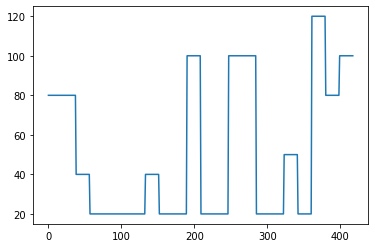

In [44]:
plt.plot(merge_fert["N"])

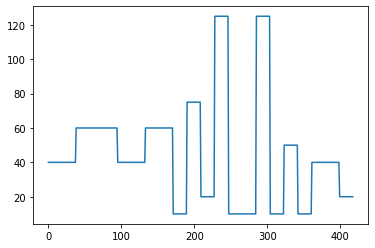

In [45]:
plt.plot(merge_fert["P"])

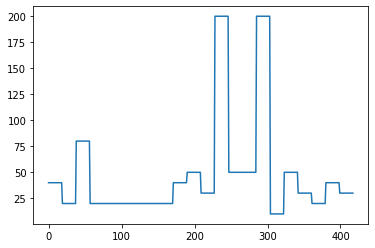

In [46]:
plt.plot(merge_fert["K"])

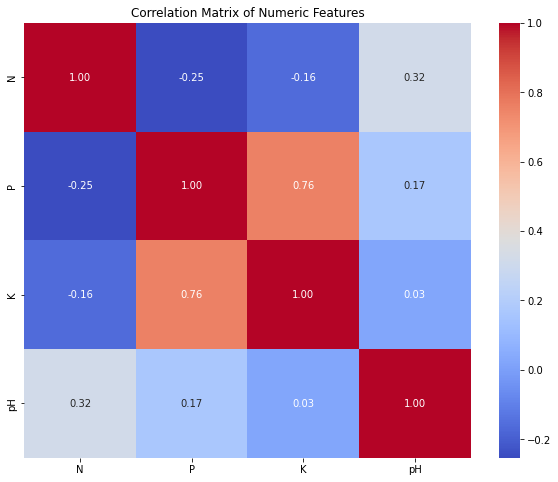

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merge_fert is your DataFrame containing numeric and categorical data
# Select only numeric columns for correlation
numeric_columns = merge_fert.select_dtypes(include=[np.number]).columns

# Compute correlation matrix for numeric columns
corr_matrix = merge_fert[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [48]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [63]:
import pandas as pd
import random

# Initialize an empty list to collect dictionaries
data = []

# Iterate over each row in merge_crop DataFrame
for i in range(merge_crop.shape[0]):
    crop = merge_crop.loc[i, 'label']  # Get the crop label from merge_crop

    # Retrieve the original N, P, K values from reco_fert based on the crop
    original_values = reco_fert.loc[reco_fert['Crop'] == crop, ['N', 'P', 'K']].iloc[0]

    # Add random variations to the original N, P, K values
    updated_N = original_values['N'] + random.randint(-20, 20)
    updated_P = original_values['P'] + random.randint(-5, 20)
    updated_K = original_values['K'] + random.randint(-5, 5)

    # Create a dictionary with updated N, P, K values
    d = {'N': updated_N, 'P': updated_P, 'K': updated_K}

    # Append the dictionary to the list
    data.append(d)

# Create a DataFrame from the list of dictionaries
temp = pd.DataFrame(data)

# Now temp DataFrame will contain the updated N, P, K values with random variations
print(temp)


        N   P   K
0      97  55  36
1      73  51  39
2      90  44  42
3      78  37  44
4      69  58  43
...   ...  ..  ..
2195   88  17  30
2196  117  40  32
2197   81  40  31
2198   81  31  25
2199   90  39  29

[2200 rows x 3 columns]


In [64]:
temp

,N,P,K
0,97,55,36
1,73,51,39
2,90,44,42
3,78,37,44
4,69,58,43
...,...,...,...
2195,88,17,30
2196,117,40,32
2197,81,40,31
2198,81,31,25


In [65]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [66]:
merge_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,97,55,36,20.879744,82.002744,6.502985,202.935536,rice
1,73,51,39,21.770462,80.319644,7.038096,226.655537,rice
2,90,44,42,23.004459,82.320763,7.840207,263.964248,rice
3,78,37,44,26.491096,80.158363,6.980401,242.864034,rice
4,69,58,43,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,88,17,30,26.774637,66.413269,6.780064,177.774507,coffee
2196,117,40,32,27.417112,56.636362,6.086922,127.924610,coffee
2197,81,40,31,24.131797,67.225123,6.362608,173.322839,coffee
2198,81,31,25,26.272418,52.127394,6.758793,127.175293,coffee


In [67]:
del merge_crop['Unnamed: 0']

KeyError: 'Unnamed: 0'

In [68]:
merge_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,97,55,36,20.879744,82.002744,6.502985,202.935536,rice
1,73,51,39,21.770462,80.319644,7.038096,226.655537,rice
2,90,44,42,23.004459,82.320763,7.840207,263.964248,rice
3,78,37,44,26.491096,80.158363,6.980401,242.864034,rice
4,69,58,43,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,88,17,30,26.774637,66.413269,6.780064,177.774507,coffee
2196,117,40,32,27.417112,56.636362,6.086922,127.924610,coffee
2197,81,40,31,24.131797,67.225123,6.362608,173.322839,coffee
2198,81,31,25,26.272418,52.127394,6.758793,127.175293,coffee


In [69]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [70]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [71]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [72]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,97,55,36,20.879744,82.002744,6.502985,202.935536,rice
1,73,51,39,21.770462,80.319644,7.038096,226.655537,rice
2,90,44,42,23.004459,82.320763,7.840207,263.964248,rice
3,78,37,44,26.491096,80.158363,6.980401,242.864034,rice
4,69,58,43,20.130175,81.604873,7.628473,262.717340,rice


In [73]:
df.shape

(2200, 8)